In [226]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

OD_2017 = pd.read_csv('../data/OD_2017.csv', low_memory=False, index_col=0);

# show the first 5 rows of the data

print(OD_2017.head())

# show the shape of the data

print(OD_2017.shape)

         start_date  start_station_code          end_date end_station_code  \
0  2017-04-15 00:00                7060  2017-04-15 00:31             7060   
1  2017-04-15 00:01                6173  2017-04-15 00:10             6173   
2  2017-04-15 00:01                6203  2017-04-15 00:04             6204   
3  2017-04-15 00:01                6104  2017-04-15 00:06             6114   
4  2017-04-15 00:01                6174  2017-04-15 00:11             6174   

   duration_sec  is_member  
0          1841          1  
1           553          1  
2           195          1  
3           285          1  
4           569          1  
(4018722, 6)


In [83]:
print(OD_2017.shape)


OD_2017.info()


(4018722, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 4018722 entries, 0 to 4018721
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   start_date          object
 1   start_station_code  int64 
 2   end_date            object
 3   end_station_code    object
 4   duration_sec        int64 
 5   is_member           int64 
dtypes: int64(3), object(3)
memory usage: 214.6+ MB


In [84]:
# convert the date column to datetime format

OD_2017['start_date'] = pd.to_datetime(OD_2017['start_date'])
OD_2017['end_date'] = pd.to_datetime(OD_2017['end_date'])

OD_2017[['start_date', 'end_date']].dtypes


start_date    datetime64[ns]
end_date      datetime64[ns]
dtype: object

In [85]:


OD_2017.isnull().sum()



start_date            0
start_station_code    0
end_date              0
end_station_code      0
duration_sec          0
is_member             0
dtype: int64

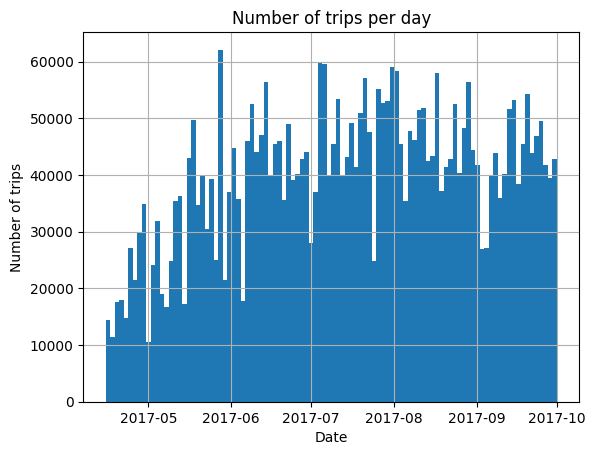

In [86]:
# graph the number of trips per day by a histogram

OD_2017['start_date'].hist(bins=100)
plt.title('Number of trips per day')
plt.xlabel('Date')
plt.ylabel('Number of trips')
plt.show()



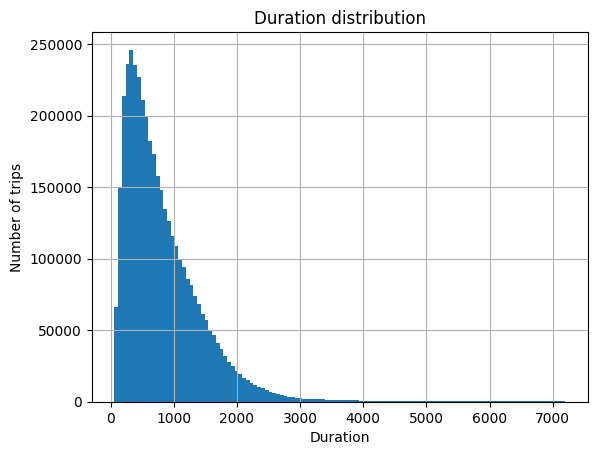

In [87]:
# graph the duration distribution  by a histogram

OD_2017['duration_sec'].hist(bins=120)
plt.title('Duration distribution')
plt.xlabel('Duration')
plt.ylabel('Number of trips')
plt.show()


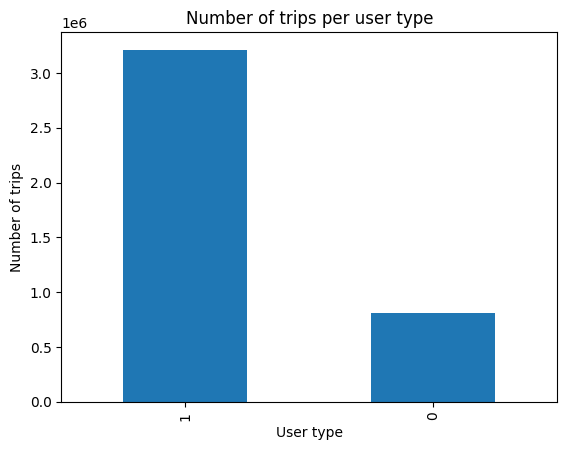

In [88]:
# numer of trips per user type

OD_2017['is_member'].value_counts().plot(kind='bar')
plt.title('Number of trips per user type')
plt.xlabel('User type')
plt.ylabel('Number of trips')
plt.show()

In [89]:
# print all unique stations

print(OD_2017['start_station_code'].unique())

# print the number of unique stations

print(OD_2017['start_station_code'].nunique())


[ 7060  6173  6203  6104  6174  6719  6223  6253  6119  6170  6012  6175
  6280  6706  6421  6281  6092  6018  6019  6205  6302  6215  6049  6070
  6014  6725  6026  6100  6097  7037  6184  6902  6386  6190  7072  6025
  6196  6233  6187  6207  6274  6354  6349  6079  6147  6221  6062  6406
  6313  6101  6129  6323  6156  6161  6067 10002  6098  6219  6157  6905
  6095  6211  6179  6213  6152  6324  6910  7033  6328  6188  6034  6063
  6096  6057  6137  6041  6268  6192  6008  6703  6408  6206  6142  6271
  6007  6052  6411  7032  6200  6350  6114  6182  6024  6907  6136  6395
  6064  6015  6090  6270  6078  6903  6276  6396  6202  6059  6120  6929
  6901  6234  6189  6151  6381  6717  7030  6130  6397  6224  6371  6254
  6105  6171  6370  6133  6035  6204  7050  6180  6108  6143  6140  6146
  6749  6321  6128  6387  7052  6181  6117  6183  6155  6081  6088  6032
  7018  6118  6195  6257  6729  6921  6065  6212  6154  6149  6248  6112
  6702  6002  7074  6177  6194  6107  6066  6385  6

In [159]:
#load the stations data 

stations = pd.read_csv('../data/Stations_2017.csv', low_memory=False, index_col=0);

# show the first 5 rows of the data

print(stations.head())

# show the shape of the data

print(stations.shape)

# show the data types of the columns

stations.info()



                         name   latitude  longitude  is_public
code                                                          
7060  de l'Église / de Verdun  45.463001 -73.571569          1
6173         Berri / Cherrier  45.519088 -73.569509          1
6203   Hutchison / Sherbrooke  45.507810 -73.572080          1
6204        Milton / Durocher  45.508144 -73.574772          1
6104    Wolfe / René-Lévesque  45.516818 -73.554188          1
(546, 4)
<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 7060 to 7001
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       546 non-null    object 
 1   latitude   546 non-null    float64
 2   longitude  546 non-null    float64
 3   is_public  546 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 21.3+ KB


In [178]:



print(stations[stations.index.isin(OD_2017['start_station_code'].value_counts().head(10).index)]['name'])

# show the least 10 used stations

print(stations[stations.index.isin(OD_2017['start_station_code'].value_counts().tail(10).index)]['name'])

# merge the two dataframes

OD_2017 = OD_2017.merge(stations, left_on='start_station_code', right_index=True)

# show the first 5 rows of the data

print(OD_2017.head())


code
6012       Métro St-Laurent (de Maisonneuve / St-Laurent)
6100                         Mackay /de Maisonneuve (Sud)
6184            Métro Mont-Royal (Rivard / du Mont-Royal)
6221                                du Mont-Royal / Clark
6406                                       Marché Atwater
6078    Métro Place-des-Arts (de Maisonneuve / de Bleury)
6136                     Métro Laurier (Rivard / Laurier)
6064                Métro Peel (de Maisonneuve / Stanley)
6015                               Berri / de Maisonneuve
6214                                      Square St-Louis
Name: name, dtype: object
code
5002                             St-Charles / Montarville
5004                               St-Charles / Charlotte
5006                            Collège Édouard-Montpetit
5003                                      Place Longueuil
6726                                        Hamel / Sauvé
7009    CHSLD Benjamin-Victor-Rousselot (Dickson / She...
5005                            St-C

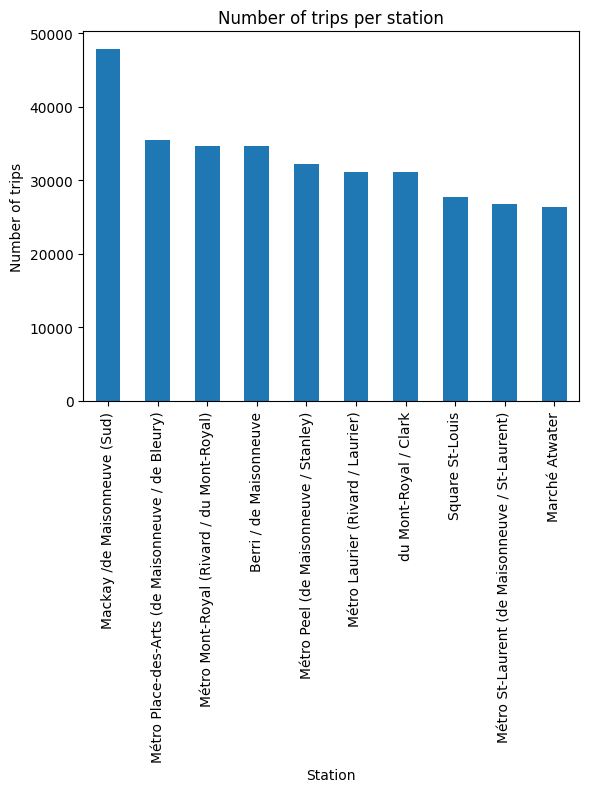

In [180]:
# graph the number of trips per station by a histogram

OD_2017['name'].value_counts().head(10).plot(kind='bar')
plt.title('Number of trips per station')
plt.xlabel('Station')
plt.ylabel('Number of trips')
plt.show()

In [191]:
# show the busiest route and the name of the stations

print(OD_2017.groupby(['start_station_code', 'end_station_code']).size().idxmax())
print(stations.loc[OD_2017.groupby(['start_station_code', 'end_station_code']).size().idxmax()[0]]['name'])

# show the next busiest route and the name of the stations

print(OD_2017.groupby(['start_station_code', 'end_station_code']).size().nlargest(2).idxmin())
print(stations.loc[OD_2017.groupby(['start_station_code', 'end_station_code']).size().nlargest(2).idxmin()[0]]['name'])

# show the least busiest route and the name of the stations

print(OD_2017.groupby(['start_station_code', 'end_station_code']).size().nlargest(3).idxmin())
print(stations.loc[OD_2017.groupby(['start_station_code', 'end_station_code']).size().nlargest(3).idxmin()[0]]['name'])

print(OD_2017.groupby(['start_station_code', 'end_station_code']).size().nlargest(4).idxmin())
print(stations.loc[OD_2017.groupby(['start_station_code', 'end_station_code']).size().nlargest(4).idxmin()[0]]['name'])



(6501, '6501')
Métro Jean-Drapeau
(6026, '6026')
de la Commune / Place Jacques-Cartier
(6050, '6406')
de la Commune / McGill
(6406, '6052')
Marché Atwater


In [192]:
# load json data as a dataframe

import json

with open('../data/stations.json') as f:
    data = json.load(f)

OD_2017_stations = pd.DataFrame(data)

# show the first 5 rows of the data

print(OD_2017_stations.head())


                                            stations  schemeSuspended  \
0  {'id': 1, 's': 'Hôtel-de-Ville 2 (du Champs-de...            False   
1  {'id': 2, 's': 'Ste-Catherine / Dézéry', 'n': ...            False   
2  {'id': 3, 's': 'Clark / Evans', 'n': '6003', '...            False   
3  {'id': 4, 's': 'Hôtel-de-Ville (du Champs-de-M...            False   
4  {'id': 6, 's': '18e avenue / Rosemont', 'n': '...            False   

       timestamp  
0  1510070614656  
1  1510070614656  
2  1510070614656  
3  1510070614656  
4  1510070614656  


In [235]:
#load the weather data

weather_description = pd.read_csv('../data/weather/weather_description.csv', low_memory=False);


# show the first 5 rows of the data

weather_description.head()





,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,haze,NaN,NaN,NaN
1,2012-10-01 13:00:00,mist,scattered clouds,light rain,sky is clear,mist,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,overcast clouds,sky is clear,sky is clear,sky is clear,haze,sky is clear,sky is clear,sky is clear
2,2012-10-01 14:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,sky is clear,sky is clear,broken clouds,overcast clouds,sky is clear,overcast clouds
3,2012-10-01 15:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds
4,2012-10-01 16:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds


In [219]:

weather_description['datetime'] = pd.to_datetime(weather_description['datetime'])

weather_description.dtypes

datetime    datetime64[ns]
Montreal            object
dtype: object

In [221]:
# merge the two dataframes


df_complete = OD_2017.sort_values(by = ['start_date'])
df_complete = pd.merge_asof(df_complete, weather_description, left_on = 'start_date', right_on = 'datetime', direction = 'nearest').drop('datetime',  axis=1)

df_complete.head()

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,name,latitude,longitude,is_public,Montreal
0,2017-04-15 00:00:00,7060,2017-04-15 00:31:00,7060,1841,1,de l'Église / de Verdun,45.463001,-73.571569,1,few clouds
1,2017-04-15 00:01:00,6173,2017-04-15 00:10:00,6173,553,1,Berri / Cherrier,45.519088,-73.569509,1,few clouds
2,2017-04-15 00:01:00,6104,2017-04-15 00:06:00,6114,285,1,Wolfe / René-Lévesque,45.516818,-73.554188,1,few clouds
3,2017-04-15 00:01:00,6203,2017-04-15 00:04:00,6204,195,1,Hutchison / Sherbrooke,45.507810,-73.572080,1,few clouds
4,2017-04-15 00:01:00,6174,2017-04-15 00:11:00,6174,569,1,Roy / St-Denis,45.519080,-73.572700,1,few clouds


In [222]:


df_complete.isnull().sum()



start_date            0
start_station_code    0
end_date              0
end_station_code      0
duration_sec          0
is_member             0
name                  0
latitude              0
longitude             0
is_public             0
Montreal              0
dtype: int64

In [223]:
df_complete.Montreal.unique().tolist()

['few clouds',
 'scattered clouds',
 'broken clouds',
 'overcast clouds',
 'sky is clear',
 'light intensity shower rain',
 'mist',
 'light rain',
 'light intensity drizzle',
 'proximity shower rain',
 'fog',
 'light shower snow',
 'thunderstorm with light rain',
 'moderate rain',
 'haze',
 'thunderstorm with rain',
 'thunderstorm',
 'proximity thunderstorm',
 'shower rain',
 'thunderstorm with heavy rain',
 'light intensity drizzle rain']

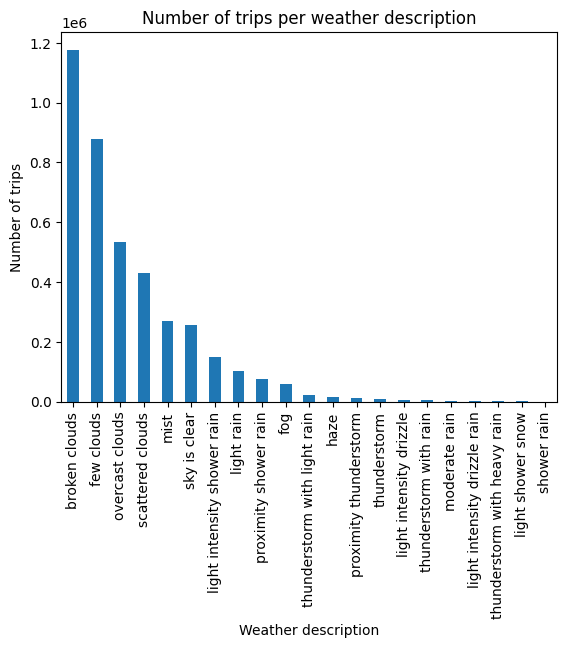

In [225]:
# show the number of trips per weather description

df_complete['Montreal'].value_counts().plot(kind='bar')
plt.title('Number of trips per weather description')
plt.xlabel('Weather description')
plt.ylabel('Number of trips')
plt.show()